Homework 1
----------------------

In class, we looked at data and analysis around the death toll from Hurricane Maria. We ended the session looking at crime statistics from the FBI's Uniform Crime Reporting Program. Review that notebook before starting this assignment to refresh yourself on the syntax that R uses. The data we start with for this homework comes from the Major Cities Chiefs Association which has been surveying its members to get a sense of where crime is headed. Their report is here -- [MCCA Violent Crime Statistics](https://assets.documentcloud.org/documents/3023302/MCCA-Violent-Crime-Data-Midyear-2016-2015-8716.pdf). 

This little homework was part of a story by Tom Meagher and Gabe Dance at The Marshall Project. Have a look at thier [Crime in Context](https://www.themarshallproject.org/2016/08/18/crime-in-context) to see where these simple tools proved helpful. Read it over and take note of the kinds of statistics used in the story. 

The data we need is in a PDF table. PDF (the Portable Document Format) is really good for representing data to a printer -- creating a standard like this was a huge deal when PDF was introduced. Often, however, it becomes a vehicle for publishing data and then you start to see its weaknesses. Extracting data from a PDF will depend, first, on the kind of PDF it is. If you can "select" text from the document, you're in luck. There are several tools to help you get reasonably close to the data. If, on the other hand, your pages are essentially images, well, then you have to rely on "optical character recognition" programs that cluster black and white pixels, say, into letters and words and sentences. 

I used [Tabula](http://tabula.technology/) to pull the data from the Chiefs' report and convert it to something more usable, a CSV (comma separated values) file. CSV files are a popular format for tabular data. Each line in the file represents a different person or object or "entity." Measurements, or "attributes" on a given entity occupy one line in the file and are separated by commas. You can read more about the format [here](https://en.wikipedia.org/wiki/Comma-separated_values). [Download the data](https://www.dropbox.com/s/qjgc6xri89hg4ub/mcca.csv?dl=0) and have a look -- perhaps open it in your favorite spreadsheet program.

To pull this data into R, we will again use the function `read.csv()`, but this time loading the data using a URL from github.com.

In [1]:
chiefs <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/mcca.csv",as.is=TRUE)
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA
Arlington PD,13,4,123,117,245,248,668,600,NA,NA
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161
Aurora PD,10,7,127,149,287,205,390,317,18,15
Austin PD,12,9,328,387,516,446,1114,942,NA,NA
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18


In [2]:
tail(chiefs)

,agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15
57,Tampa PD,12,21,45,32,258,296,659,772,38,75
58,Tucson PD,11,16,221,213,537,516,1219,961,NA,NA
59,Tulsa PD,30,27,185,170,459,426,1345,1176,NA,NA
60,Virginia Beach PD,8,12,102,75,131,126,136,129,NA,NA
61,Washington DC (Metro PD),68,63,145,128,1491,1527,1102,1211,NA,NA
62,Wichita PD,10,13,183,165,289,329,1100,855,61,24


Again, "chiefs" is a data frame and `head()` and `tail()` give us a peak at the top and bottom. We can see how much there is using the command `dim()`.

In [3]:
dim(chiefs)

[1] 62 11

Which means 62 agencies, with 11 different attributes recorded for each.

Mid-year Crime Calculations
---------------------------

That's enough background for one day. Let's look at the data. When the MCCA report appearaed over the summer, it generated some attention. [CNN](http://www.cnn.com/2016/07/25/politics/violent-crime-report-us-cities-homicides-rapes/), [Breitbart](http://www.breitbart.com/big-government/2016/07/26/survey-violent-crime-major-cities/), [The New York Times](http://www.nytimes.com/2016/05/14/us/murder-rates-cities-fbi.html) and a number of other outlets picked up the data and tried to draw some meaning from it. Have a read and see what you think. 

In the cell below, write a 3 sentence summary (or less) of what the data are, who collected them and why. With that completed, what kinds of questions do we want to ask about these data? Write down 5 questions.

**The data** 

The data is collected by [MCCA](https://www.majorcitieschiefs.com/), “a professional association of Chiefs and Sheriffs representing the largest cities in the United States and Canada”. MCCA’s purposes include:  

- To influence national public policy on law enforcement matters
- To enhance the development of current and future leaders
- To encourage and sponsor research

The data set contains number of cases of five sorts of crime in 2015 and 2016.

**My questions**

- How does the number of each crime change from 2015 to 2016? (the big picture)
- Which crime has the biggest aggregate number of cases?
- Which city has the biggest decline in crime X?
- Which city has the biggest surge in crime X?
- What if we use number of crime / population instead of using the absolute values? Would the results change?

During his primary run, in a speech the RNC, Trump said that “Our president, who has used the pulpit of the presidency to divide us by race and color, has made America a more dangerous environment for everyone than frankly I have ever seen and anybody in this room has ever watched or seen.” This kicked off a wave of reporting about the safety of our cities. At the DNC in Philadelphia, Obama responded, “Donald Trump calls [America] ‘a divided crime scene’ that only he can fix. It doesn’t matter to him that illegal immigration and the crime rate are as low as they’ve been in decades…”

How do we think about these conflicting impressions? We'll look at this question while learning a bit of R syntax (heck it's day 1).

**Extracting data**. To try out your skills let's do a speed round of simple tasks. First, extract just the agency names from this table as a vector. Hint: You'll need to use the `$`. You can also use the `filter()` command and other verbs from `dplyr2`. Try them all out to get comfortable. The goal of this homework is to rehearse some of what we went over in class. I want you to be comfortable with both simple extractions like with the `$` and pandas-like subsetting, together with the verbs from `dplyr2`.

In [4]:
print(chiefs$agency)

 [1] "Albuquerque PD"                    "Arlington PD"                     
 [3] "Atlanta PD"                        "Aurora PD"                        
 [5] "Austin PD"                         "Baltimore County PD"              
 [7] "Baltimore PD"                      "Boston PD"                        
 [9] "Charlotte-Mecklenburg PD"          "Chicago PD"                       
[11] "Cincinnati PD"                     "Cleveland PD"                     
[13] "Columbus Police"                   "Dallas PD"                        
[15] "Denver PD"                         "El Paso PD"                       
[17] "Fairfax County PD"                 "Fort Worth PD"                    
[19] "Fresno PD"                         "Honolulu PD 2"                    
[21] "Houston PD"                        "Indianapolis PD"                  
[23] "Jacksonville Sheriff's Dept"       "Las Vegas Metropolitan PD"        
[25] "Long Beach PD"                     "Los Angeles County Sheriff's Dept"

Using `dplyr`:

In [5]:
library(dplyr)
library(dplyr, warn.conflicts = FALSE)

Warning message:
“package ‘dplyr’ was built under R version 3.5.1”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
select(chiefs, agency)

agency
Albuquerque PD
Arlington PD
Atlanta PD
Aurora PD
Austin PD
Baltimore County PD
Baltimore PD
Boston PD
Charlotte-Mecklenburg PD
Chicago PD


... and the vaues for homicides in 2016.

In [7]:
chiefs$hom16

[1]  34  13  57  10  12  16 137  22  25 316  35  47  39  83  19   8   7  34  17
[20]   8 158  61  59  90  15 110 134  54 106  11  27  37  54   8  34   3  67 161
[39]  45  28  19  12  65 122  78  30  48   6  13   3  70  24  26  25  12  87  12
[58]  11  30   8  68  10

**Computing crime rates**. We can compare the overall numbers of homicides in these 62 cities by adding or "sum"ming the columns for 2015 and 2016. Compute the total homicide count for 2015...

In [8]:
total_hom15 <- sum(chiefs$hom15,na.rm=TRUE)
total_hom15

[1] 2636

... and then do it for for 2016.

In [9]:
total_hom16 <- sum(chiefs$hom16,na.rm=TRUE)
total_hom16

[1] 2980

To compare the overall change from 2015 to 2016, we might take the percentage change. That is the difference between homicides in 2016 and 2015 divided by the total in 2015. Use the two numbers above to compute this percent change...

In [10]:
(total_hom16 - total_hom15) / total_hom15

[1] 0.1305008

In [11]:
library(scales)

In [12]:
# cat() is concatenate, percent() is a verb from the library scales
cat('Homicides increased by', percent((total_hom16 - total_hom15) / total_hom15), 'from 2015 to 2016.')

Homicides increased by 13.1% from 2015 to 2016.

A big increase. Now, let's compute the rates of change for each agency. Rather than work on the crime categories separately, We will focuse on [violent crime](https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/violent-crime/violent-crime). The FBI defines violent crime as the sum of homicides, rapes, robberies and aggravated assault. Let's use R to create these sums.

We can add up the four crime categories as "vectors" -- meaning we can add up all four crime categories for each agency with a simple mathematical expression. Add up the data for 2016 for homicides, rapes, robberies and aggravated assaults.

In [13]:
chiefs$hom16 + chiefs$rap16 + chiefs$rob16 + chiefs$agg16

[1]  2544  1049  2162   814  1970  1563  4991  2066  3161  8920  1086  2625
[13]  2027  4774  2210  1354   338  2169  1563   744 11593  3402  2409  3255
[25]  1408  7082 14078  2342  4335   923  1922  2899  4383   786  3701   510
[37]  2001 18120  1231  2921  1676  1105  1193  7374    NA  1143   820   736
[49]  1716   770  5111  2644  2988  1919  1885  2776   974  1988  2019   377
[61]  2806  1582

... And  store it back in the original data frame using the `$` notation or `mutate()` as we did in class. Call the new variable `vc16` for "violent crime 2016"

In [14]:
chiefs$vc16 <- chiefs$hom16 + chiefs$rap16 + chiefs$rob16 + chiefs$agg16

Have a look at the top of the file to make sure your column has been added. 

In [15]:
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162
Aurora PD,10,7,127,149,287,205,390,317,18,15,814
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563


Now, do the same thing, but add a column for 2015 calling it `vc15` and have a look again.

In [16]:
chiefs$vc15 <- chiefs$hom15 + chiefs$rap15 + chiefs$rob15 + chiefs$agg15

In [17]:
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544,2693
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049,969
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162,2184
Aurora PD,10,7,127,149,287,205,390,317,18,15,814,678
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970,1784
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563,1993


We can now look at the change for each city. This is defined as the difference between 2016 and 2016 as a fraction of 2015's total. As with simple addition of columns, we can express more complicated arithmetic expressions in one go. Write out your one line to compute the relative change.

In [18]:
(chiefs$vc16 - chiefs$vc15) / chiefs$vc15

[1] -0.05532863  0.08255934 -0.01007326  0.20058997  0.10426009 -0.21575514
 [7]  0.08241162 -0.04836481  0.21811175  0.23854485 -0.01985560 -0.07830056
[13] -0.14000849  0.09949332  0.01376147  0.12833333  0.15358362  0.02070588
[19]  0.18678815 -0.02490170  0.13656863  0.15049036 -0.01633320  0.19977884
[25]  0.08141321  0.09138542  0.18471766  0.13414044  0.07755406 -0.09421001
[31] -0.07239382 -0.08317521  0.00967519 -0.12276786  0.06106651  0.05590062
[37]  0.21125908  0.01523980 -0.12880396 -0.07825813  0.09829620 -0.08450704
[43] -0.06062992 -0.03582636          NA  0.08857143  0.07189542 -0.10462287
[49] -0.06331878  0.19751166  0.27615481 -0.07065026 -0.13441483  0.12882353
[55]  0.03231106 -0.01069138 -0.13113292  0.16529894  0.12229016  0.10233918
[61] -0.04199385  0.16152717

And store the change in a column called `change` and have a brief look.

In [19]:
chiefs$change <- (chiefs$vc16 - chiefs$vc15) / chiefs$vc15

In [20]:
head(chiefs)

agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
Albuquerque PD,34,25,156,199,753,861,1601,1608,125,NA,2544,2693,-0.05532863
Arlington PD,13,4,123,117,245,248,668,600,NA,NA,1049,969,0.08255934
Atlanta PD,57,45,72,72,1005,1003,1028,1064,161,161,2162,2184,-0.01007326
Aurora PD,10,7,127,149,287,205,390,317,18,15,814,678,0.20058997
Austin PD,12,9,328,387,516,446,1114,942,NA,NA,1970,1784,0.10426009
Baltimore County PD,16,14,141,134,583,652,823,1193,20,18,1563,1993,-0.21575514


Compute the so-called 6 number summary (or 5 number if you learned that plus a mean) of the per-city changes in violent crimes using the command `summary()`. 

In [21]:
summary(chiefs$change)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-0.21576 -0.06063  0.05590  0.04028  0.12882  0.27615        1 

We might reasonably ask about which cities are on the rise and which have had falling crime numbers. We can use a "logical expression" for this. It will return a set of boolean data types, `TRUE` and `FALSE`. Compute the logical expression, returning `TRUE` and `FALSE` values whether crime is rising or falling between 2015 and 2016 in each city.

In [22]:
chiefs$change > 0

[1] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[13] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
[37]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE    NA  TRUE  TRUE FALSE
[49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[61] FALSE  TRUE

Notice we have an `NA` or missing value. One city is missing data. We can ask which crime statistics are `NA` by simply asking...

In [23]:
is.na(chiefs$change)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE

Use this vector of logical data (`TRUE` and `FALSE` values) to subset the `chiefs` data frame and keep just the row(s) that have a problem. Identify the problem.

In [24]:
chiefs[is.na(chiefs$change),]

,agency,hom16,hom15,rap16,rap15,rob16,rob15,agg16,agg15,non16,non15,vc16,vc15,change
45,Phoenix PD 4,78,52,NA,509,NA,1502,NA,2450,NA,NA,NA,4513,NA


Use the same logical vector and find out how many cities had missing data using the `sum()` command.

In [25]:
sum(is.na(chiefs$change))

[1] 1

In [26]:
# Additionally, this will return all rows with at least 1 NA:
# chiefs[rowSums(is.na(chiefs)) > 0,]

In [27]:
# And this will return a vector showing how many NA's there are for each column:
# colSums(is.na(chiefs))

Because there is an `NA`, we have to remove it if we want `sum()` to return a non-missing value. We know there are missing values and we've looked at where they came from. It's safe, then, to consider dropping them out when considering how many ups and downs we have.

In [28]:
sum(chiefs$change > 0, na.rm=TRUE)

[1] 36

And let's have a look. Use a histogram to show the data. What's a histogram again?

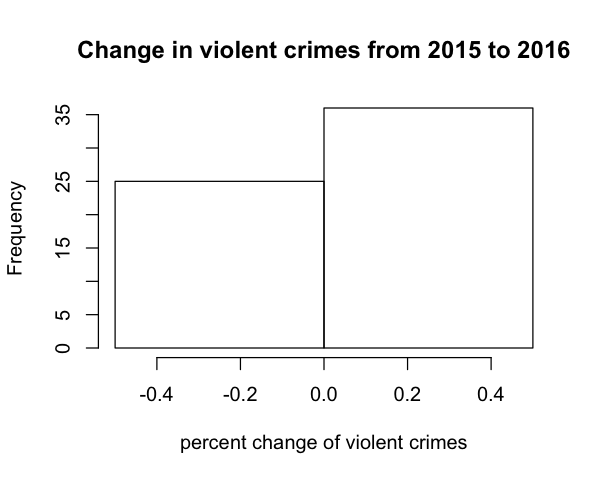

In [29]:
options(repr.plot.width=5, repr.plot.height=4)
hist(chiefs$change, breaks=1, main="Change in violent crimes from 2015 to 2016", xlab="percent change of violent crimes")

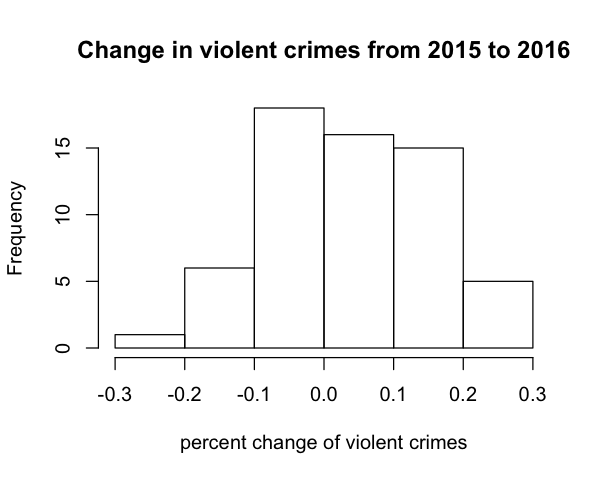

In [30]:
options(repr.plot.width=5, repr.plot.height=4)
hist(chiefs$change, breaks=5, main="Change in violent crimes from 2015 to 2016", xlab="percent change of violent crimes")

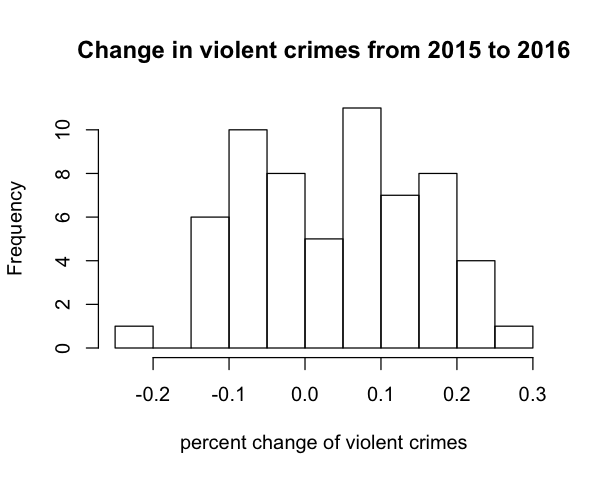

In [31]:
options(repr.plot.width=5, repr.plot.height=4)
hist(chiefs$change, breaks=10, main="Change in violent crimes from 2015 to 2016", xlab="percent change of violent crimes")

What do you see? Change the `breaks` and tell me what you see. 

- From 2015 to 2016, more cities saw an increase (rather than decrease) in violent crimes.
- In both the two groups of cities (increase & decrease), the majority of the percent change values falls into the 5%~10% range, making two peaks visible in the histogram with `breaks=10` (or something larger).

Now, let's use that logical mask again, this time to find our errant row with missing data and to create a data frame that leaves it out. Call it `chiefs2`. One hint: Using `!` turns `TRUE` to `FALSE` and `FALSE` to `TRUE`. So the expression below identifies just those rows that are *not* `NA`'s. 

In [32]:
!is.na(chiefs$change)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[61]  TRUE  TRUE

In [33]:
chiefs2 <- chiefs[!is.na(chiefs$change),]

In [34]:
# Making sure the new dataframe doesn't have a NA in the change column:
# sum(is.na(chiefs2$change))

Find those cities with a relative increase greater than 10%...

In [35]:
chiefs2[chiefs2$change>0.1,][c('agency','change')]

,agency,change
4,Aurora PD,0.2005900
5,Austin PD,0.1042601
9,Charlotte-Mecklenburg PD,0.2181118
10,Chicago PD,0.2385448
16,El Paso PD,0.1283333
17,Fairfax County PD,0.1535836
19,Fresno PD,0.1867882
21,Houston PD,0.1365686
22,Indianapolis PD,0.1504904
24,Las Vegas Metropolitan PD,0.1997788


... and an increase less than 10%.

In [36]:
chiefs2[chiefs2$change>0 & chiefs2$change<0.1,][c('agency','change')]

,agency,change
2,Arlington PD,0.08255934
7,Baltimore PD,0.08241162
14,Dallas PD,0.09949332
15,Denver PD,0.01376147
18,Fort Worth PD,0.02070588
25,Long Beach PD,0.08141321
26,Los Angeles County Sheriff's Dept,0.09138542
29,Memphis PD,0.07755406
33,Milwaukee PD,0.00967519
35,Nashville PD,0.06106651


Now, use `chiefs2` to create a the percentage change for all the cities taken together. What do you see?

In [37]:
(sum(chiefs2$vc16) - sum(chiefs2$vc15)) / sum(chiefs2$vc15)

[1] 0.05439942

When all cities in the data set are taken as a whole, we see a 5.44% increase in violent crimes from 2015 to 2016.

National trends
---------------

The data we've been looking captures just 2015-2016 -- well, six months of 2015 and six months of 2016. It is a bit dangerous to make interpretations based on just one year's data. Crime fluctuates naturally from year to year and those fluctuations are best understood in terms of larger overall trends. To assess these trends, we appeal to the Uniform Crime Reports compiled by the FBI. You can [access the raw data here.](https://www.icpsr.umich.edu/icpsrweb/NACJD/series/57) I have a nicer form of the data for you already [loaded on Github](https://github.com/cocteau/lede2018/raw/master/data/ucr_crime_1975_2015.csv). 

Let's bring it into R.

In [38]:
ucr <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/ucr_crime_1975_2015.csv",as.is=TRUE)
head(ucr)

ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
NM00101,1975,"Albuquerque, N.M.",286238,30,181,819,1353,2383,12,832.5240,10.480789,63.23409,286.1255,472.6836,NA,NA
TX22001,1975,"Arlington, Texas",112478,5,28,113,132,278,12,247.1594,4.445314,24.89376,100.4641,117.3563,NA,NA
GAAPD00,1975,Atlanta,490584,185,443,3887,3518,8033,12,1637.4362,37.710158,90.30054,792.3210,717.1045,NA,NA
CO00101,1975,"Aurora, Colo.",116656,7,44,171,389,611,12,523.7622,6.000549,37.71773,146.5848,333.4591,NA,NA
TX22701,1975,"Austin, Texas",300400,33,190,529,463,1215,12,404.4607,10.985353,63.24900,176.0985,154.1278,NA,NA
MDBPD00,1975,Baltimore,864100,259,463,9055,6309,16086,12,1861.5901,29.973383,53.58176,1047.9111,730.1238,NA,NA


We've seen simple summaries and graphics for quantitative data. We have various tabular summaries for quantitative data. Here we `table()` the column of years for UCR reports to see how many cities are reporting per year.

In [39]:
table(ucr$year)


1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 
  69   69   69   69   69   69   69   69   69   69   69   69   69   69   69   69 
1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 
  69   69   69   69   69   69   69   69   69   69   69   69   69   69   69   69 
2007 2008 2009 2010 2011 2012 2013 2014 2015 
  69   69   69   69   69   69   69   69   69 

And here we are doing the same by department, to see how many years worth of data we have for each department. It's very regular!

In [40]:
table(ucr$department_name)


          Albuquerque, N.M.            Arlington, Texas 
                         41                          41 
                    Atlanta               Aurora, Colo. 
                         41                          41 
              Austin, Texas                   Baltimore 
                         41                          41 
      Baltimore County, Md.                      Boston 
                         41                          41 
              Buffalo, N.Y. Charlotte-Mecklenburg, N.C. 
                         41                          41 
                    Chicago                  Cincinnati 
                         41                          41 
                  Cleveland              Columbus, Ohio 
                         41                          41 
                     Dallas                      Denver 
                         41                          41 
                    Detroit              El Paso, Texas 
                         41   

In [41]:
summary(ucr$violent_crime)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    154    3015    5136   29632    9058 1932274      35 

The summary shows a few missing values of violent crime numbers. Pull out the cities missing data on `violent_crime`.

In [42]:
# "Pull out" interpretation 1: These are the cities missing data on violent_crime
ucr[is.na(ucr$violent_crime),][c('year','department_name','violent_crime')]

,year,department_name,violent_crime
31,1975,"Louisville, Ky.",NA
100,1976,"Louisville, Ky.",NA
169,1977,"Louisville, Ky.",NA
238,1978,"Louisville, Ky.",NA
307,1979,"Louisville, Ky.",NA
376,1980,"Louisville, Ky.",NA
445,1981,"Louisville, Ky.",NA
514,1982,"Louisville, Ky.",NA
583,1983,"Louisville, Ky.",NA
652,1984,"Louisville, Ky.",NA


In [43]:
# "Pull out" interpretation 2: drop those rows and save it back to the original dataframe
# ucr <- ucr[!is.na(ucr$violent_crime),]
# OR create a new dataframe
# ucr1 <- ucr[!is.na(ucr$violent_crime),]

Just to make sure we understand the columns, violent crime is meant to be a combination of homicides, rapes, robberies and aggravated assault. Let's form that sum and compare it to the violent crime column in the data set. Useful, but not necessary hint: The command `all()` takes a logical vector and asks "Are all the values `TRUE`?". If so, it returns `TRUE`. 

So, create a vector from the data set that represents the category of violent crimes, compare that total to the `violent_crime` column in the data set, testing if they are all equal to each other.

In [44]:
# These are the columns we want:
# ucr[c('homs_sum','rape_sum','rob_sum','agg_ass_sum')]

In [45]:
ucr$homs_sum + ucr$rape_sum + ucr$rob_sum + ucr$agg_ass_sum

[1]   2383    278   8033    611   1215  16086   1259  11386   3350   1937
  [11]  37160   3578  10403   3980   7655   4960  30387   1618    805   1939
  [21]   1141   1596   8924   4655   4579   6072   2594   3189  30405   9792
  [31]     NA   5429    267   6213   6702   3204   3326    967   3158    993
  [41]     NA   5993 132182   7136   5900   2666   2540   1116  16332   4649
  [51]   4967   4076   4147    721   2412   1070   4222   3859   9137   2116
  [61]   3971  10563    964   3168   1810   1768    452  12704   1137   2420
  [71]    274   7529    546   1202  14191   1798   9888   3091   1895  30640
  [81]   3461   8496   3287   7244   4107  29699   1573    708   1732   1267
  [91]   1696   8045   4144   4443   5578   2473   2950  31960  10104     NA
 [101]   4780    311   5172   6787   2692   2954    932   2831    887     NA
 [111]   4810 134153   6565   5514   2360   2008   1118  13113   3856   4621
 [121]   4304   3869    531   2799    959   3285   4118  10756   2523   4128
 [131]   9574   1810   2935   1464   1747    481  10399   1114   2390    389
 [141]   7595    585   1260  14283   4010   9422   3945   2245  28873   3439
 [151]   9421   3238   8899   5032  24070   1560    841   2561   1673   1660
 [161]   9304   3785   4171   5616   2729   3391  33676  10589     NA   5231
 [171]    385   5346   7204   2535   3130    916   2957   1058     NA   5947
 [181] 121916   6175   5764   2695   1918   1143  12047   4295   4572   3973
 [191]   3724    571   2915   1064   3755   4414   9367   2670   4156   9726
 [201]   2042   3194   1578   1850    463   9843   1397   2434    450   8845
 [211]    831   1413  14659   4600  10035   3181   2435  27686   3303   9697
 [221]   3353   9884   4877  21602   1490    917   2670   1997   2044  10852
 [231]   3733   4368   5029   2886   3688  36797  10766     NA   5412    493
 [241]   6272   8437   2438   3098   1138   3153   1005     NA   7635 122685
 [251]   6843   5374   3607   1856   1620  12369   5401   4818   4017   3967
 [261]    645   3198   1062   3446   4520  10509   2755   4900  10095   2523
 [271]   3510   1654   2160    465   9515   1231   2679    626  10715   1033
 [281]   1495  15523   5041  11392   3857   2485  27807   3808   9736   4242
 [291]  11453   5118  21021   2245    882   3799   1976   2196  14216   4178
 [301]   4903   5942   3210   3990  43372  11529     NA   5785    755   6825
 [311]   9508   3039   3899   1241   3251   1257     NA   8894 132383   9647
 [321]   6064   3812   2017   1726  14537   5803   4649   4558   4538    804
 [331]   3212   1119   4088   5436  11041   3236   4857  10774   3023   4206
 [341]   2029   2326    530  10553   1456   2810    806  11075   1278   1723
 [351]  16571   5774  12478   3833   2759  28658   3930  11466   5130  12681
 [361]   5520  23288   2811    995   4693   2369   2456  13499   4453   4848
 [371]   7013   4421   4634  51447  12593     NA   6898    812  11474  12429
 [381]   3310   3917   1433   3634   1462     NA   8172 149549  11270   7536
 [391]   3734   1983   2350  17299   7020   5120   4957   5194    784   3221
 [401]   1132   4265   6189  12710   3788   5201  10983   2967   5089   2584
 [411]   2715    530  12772   1823   2985    699  10608   1437   1545  17737
 [421]   6127  14071   3341   3166  25609   3892  12429   5263  12749   5085
 [431]  23176   3510    934   4946   2158   1965  10274   4539   5634   7714
 [441]   4648   4579  52818  12059     NA   7056    741  11211  12755   3424
 [451]   3883   1716   3087   1708     NA   8121 156946  12320   7036   4128
 [461]   1583   2373  17616   6319   5983   6452   5571    719   3535   1268
 [471]   4651   6594  12011   4122   5414  10364   1663   5674   2810   2678
 [481]    606  14468   1729   2659    607  10486   1406   1532  16683   6539
 [491]  10970   3557   4100  26404   3757   9386   4590  13053   4935  23746
 [501]   3922    966   4901   2182   2151  17801   4341   5643   6729   4470
 [511]   4498  53957  11870     NA   7609    705   9963  12088   3593   4247

In [46]:
all((ucr$homs_sum + ucr$rape_sum + ucr$rob_sum + ucr$agg_ass_sum) == ucr$violent_crime, na.rm=TRUE)

[1] TRUE

Just to be clear, let's look at places that have huge crime numbers...

In [47]:
ucr[ucr$violent_crime > 1000000,]

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
41,NA,1975,National,NA,20510,NA,NA,NA,1039710,NA,487.8,9.6,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
110,NA,1976,National,NA,18780,NA,NA,NA,1004210,NA,467.8,8.7,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
179,NA,1977,National,NA,19120,NA,NA,NA,1029580,NA,475.9,8.8,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
248,NA,1978,National,NA,19560,NA,NA,NA,1085550,NA,497.8,9.0,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
317,NA,1979,National,NA,21460,NA,NA,NA,1208030,NA,548.9,9.8,NA,NA,NA,NA,NA


Or, using `dplyr2` verbs...

In [48]:
filter(ucr, violent_crime>1000000)

ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
NA,1975,National,NA,20510,NA,NA,NA,1039710,NA,487.8,9.6,NA,NA,NA,NA,NA
NA,1976,National,NA,18780,NA,NA,NA,1004210,NA,467.8,8.7,NA,NA,NA,NA,NA
NA,1977,National,NA,19120,NA,NA,NA,1029580,NA,475.9,8.8,NA,NA,NA,NA,NA
NA,1978,National,NA,19560,NA,NA,NA,1085550,NA,497.8,9.0,NA,NA,NA,NA,NA
NA,1979,National,NA,21460,NA,NA,NA,1208030,NA,548.9,9.8,NA,NA,NA,NA,NA
NA,1980,National,NA,23040,NA,NA,NA,1344520,NA,596.6,10.2,NA,NA,NA,NA,NA
NA,1981,National,NA,22520,NA,NA,NA,1361820,NA,593.5,9.8,NA,NA,NA,NA,NA
NA,1982,National,NA,21010,NA,NA,NA,1322390,NA,570.8,9.1,NA,NA,NA,NA,NA
NA,1983,National,NA,19308,NA,NA,NA,1258087,NA,538.1,8.3,NA,NA,NA,NA,NA
NA,1984,National,NA,18692,NA,NA,NA,1273282,NA,539.9,7.9,NA,NA,NA,NA,NA


The extra `NA` rows correspond to the missing data entries in `violent_crime` that we found above. R will (bless its heart) just turn the entire row into missing values. That can be annoying in cases when we want `NA`'s to be removed from the table. In the next lecture we'll see some higher-level tools that will do this for us, but for now we can just add to our logical expression and take only those rows where the crime count is not missing and is bigger than 1000000. We join two logical conditions with an `&` for "and" and `|` for "or".

In [56]:
ucr[(!is.na(ucr$violent_crime)) & (ucr$violent_crime>1000000),]

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
41,NA,1975,National,NA,20510,NA,NA,NA,1039710,NA,487.8,9.6,NA,NA,NA,NA,NA
110,NA,1976,National,NA,18780,NA,NA,NA,1004210,NA,467.8,8.7,NA,NA,NA,NA,NA
179,NA,1977,National,NA,19120,NA,NA,NA,1029580,NA,475.9,8.8,NA,NA,NA,NA,NA
248,NA,1978,National,NA,19560,NA,NA,NA,1085550,NA,497.8,9.0,NA,NA,NA,NA,NA
317,NA,1979,National,NA,21460,NA,NA,NA,1208030,NA,548.9,9.8,NA,NA,NA,NA,NA
386,NA,1980,National,NA,23040,NA,NA,NA,1344520,NA,596.6,10.2,NA,NA,NA,NA,NA
455,NA,1981,National,NA,22520,NA,NA,NA,1361820,NA,593.5,9.8,NA,NA,NA,NA,NA
524,NA,1982,National,NA,21010,NA,NA,NA,1322390,NA,570.8,9.1,NA,NA,NA,NA,NA
593,NA,1983,National,NA,19308,NA,NA,NA,1258087,NA,538.1,8.3,NA,NA,NA,NA,NA
662,NA,1984,National,NA,18692,NA,NA,NA,1273282,NA,539.9,7.9,NA,NA,NA,NA,NA


... ah, there are national totals in this data set. So let's have a look at one municipality. Let's pull the data aside and make some plots!

In [50]:
miami <- filter(ucr, department_name=="Miami")
miami

ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
FL01306,1975,Miami,350742,98,178,2657,3280,6213,12,1771.388,27.94077,50.749554,757.5369,935.1603,NA,NA
FL01306,1976,Miami,338721,84,145,2313,2630,5172,12,1526.920,24.79917,42.808093,682.8629,776.4502,NA,NA
FL01306,1977,Miami,333713,84,178,2447,2637,5346,12,1601.975,25.17133,53.339247,733.2648,790.2000,NA,NA
FL01306,1978,Miami,330060,96,207,2832,3137,6272,12,1900.261,29.08562,62.715870,858.0258,950.4333,NA,NA
FL01306,1979,Miami,362840,134,261,3390,3040,6825,12,1880.994,36.93088,71.932532,934.2961,837.8349,NA,NA
FL01306,1980,Miami,335718,220,325,6890,4039,11474,12,3417.749,65.53119,96.807440,2052.3177,1203.0931,NA,NA
FL01306,1981,Miami,356734,210,382,6196,4423,11211,12,3142.678,58.86739,107.082588,1736.8684,1239.8594,NA,NA
FL01306,1982,Miami,365506,190,349,5123,4301,9963,12,2725.810,51.98273,95.484069,1401.6186,1176.7249,NA,NA
FL01306,1983,Miami,374769,144,365,4719,4556,9784,12,2610.675,38.42367,97.393328,1259.1757,1215.6822,NA,NA
FL01306,1984,Miami,400646,170,273,5705,4780,10928,12,2727.595,42.43147,68.139954,1423.9503,1193.0732,NA,NA


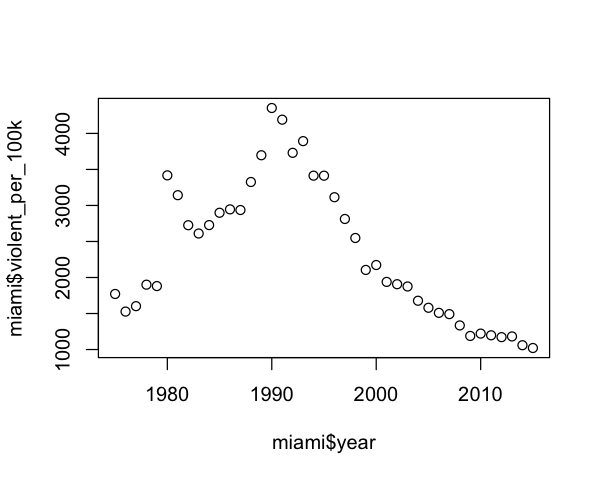

In [51]:
plot(miami$year, miami$violent_per_100k)

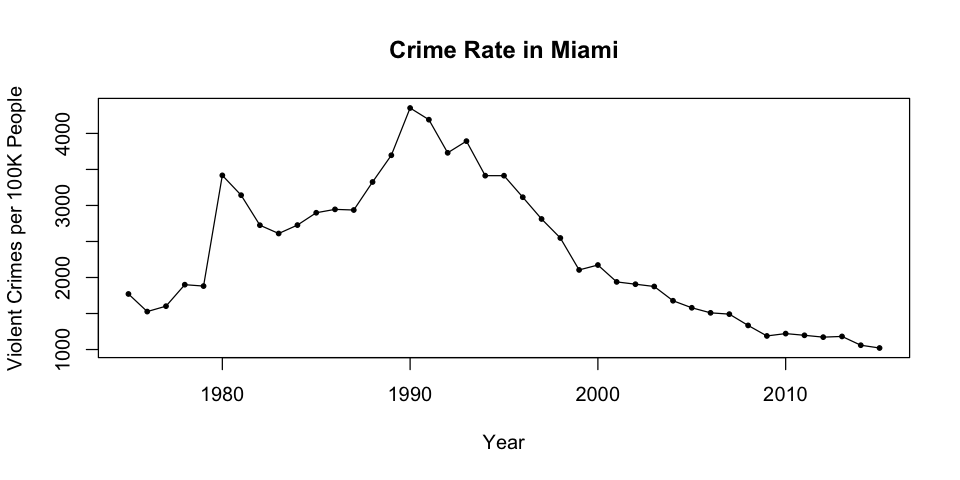

In [52]:
options(repr.plot.width=8,repr.plot.height=4)

plot(miami$year,miami$violent_per_100k,xlab="Year",ylab="Violent Crimes per 100K People",type="l",main="Crime Rate in Miami")
points(miami$year,miami$violent_per_100k,pch=19,cex=0.5)

Create a plot for a city larger than Miami and a plot for a city smaller than Miami.

- **Picking the cities**

In [69]:
# Miami's total population in 2015
miami_pop <- miami[miami$year==2015,]$total_pop
miami_pop

[1] 437969

In [97]:
# Pick out the cities that have a larger population than Miami in 2015
larger_cities <- ucr[(ucr$year==2015) & (ucr$total_pop > miami_pop) & (!is.na(ucr$ORI)),]
larger_cities

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
2761,NM00101,2015,"Albuquerque, N.M.",559721,43,404,1686,3273,5406,NA,965.83834,7.682399,72.178818,301.22150,584.75562,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2763,GAAPD00,2015,Atlanta,464710,94,170,1995,2944,5203,NA,1119.62299,20.227669,36.581954,429.29999,633.51337,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2765,TX22701,2015,"Austin, Texas",938728,23,487,929,2058,3497,NA,372.52537,2.450124,51.878712,98.96370,219.23283,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2766,MDBPD00,2015,Baltimore,621252,344,287,4313,4598,9542,NA,1535.93067,55.372055,46.197034,694.24324,740.11834,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2767,MD00301,2015,"Baltimore County, Md.",828871,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,,
2768,MA01301,2015,Boston,665258,38,240,1551,2873,4702,NA,706.79345,5.712070,36.076229,233.14263,431.86253,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2770,NC06001,2015,"Charlotte-Mecklenburg, N.C.",877817,61,216,1947,3724,5948,NA,677.58998,6.949057,24.606495,221.80022,424.23421,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2771,ILCPD00,2015,Chicago,2728695,478,1432,9649,13104,24663,NA,903.83865,17.517531,52.479299,353.61226,480.22956,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2774,OHCOP00,2015,"Columbus, Ohio",847745,77,806,2240,1508,4631,NA,546.27276,9.082920,95.075760,264.23040,177.88368,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls
2775,TXDPD00,2015,Dallas,1301977,136,782,4177,3943,9038,NA,694.17509,10.445653,60.062505,320.81980,302.84713,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls


In [77]:
# Randomly pick a row from the group of cities larger than Miami
larger_cities[sample(nrow(larger_cities),1),]

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
2807,NB02802,2015,"Omaha, Neb.",452252,48,174,655,1452,2329,NA,514.9784,10.61355,38.47413,144.8308,321.0599,Crime in the U.S. 2015,https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2015.xls


In [80]:
# Make a dataframe of a randomly picked city
larger_city <- larger_cities[sample(nrow(larger_cities),1),]$department_name
df_larger_city <- filter(ucr, department_name==larger_city)
head(df_larger_city)

ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
TX07102,1975,"El Paso, Texas",369000,21,122,840,635,1618,12,438.4824,5.691057,33.06233,227.6423,172.0867,NA,NA
TX07102,1976,"El Paso, Texas",361413,25,118,792,638,1573,12,435.2361,6.917294,32.64963,219.1399,176.5293,NA,NA
TX07102,1977,"El Paso, Texas",386000,32,107,824,597,1560,12,404.1451,8.290155,27.72021,213.4715,154.6632,NA,NA
TX07102,1978,"El Paso, Texas",399000,21,121,775,573,1490,12,373.4336,5.263158,30.32581,194.2356,143.6090,NA,NA
TX07102,1979,"El Paso, Texas",413244,33,175,813,1224,2245,12,543.2626,7.985597,42.34786,196.7361,296.1930,NA,NA
TX07102,1980,"El Paso, Texas",425122,54,218,828,1711,2811,12,661.2220,12.702236,51.27940,194.7676,402.4727,NA,NA


In [98]:
# Do the same for smaller cities
smaller_cities <- ucr[(ucr$year==2015) & (ucr$total_pop < miami_pop) & (!is.na(ucr$ORI)),]
smaller_city <- smaller_cities[sample(nrow(smaller_cities),1),]$department_name
df_smaller_city <- filter(ucr, department_name==smaller_city)
head(df_smaller_city)

ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
FL04804,1975,"Orlando, Fla.",118457,21,86,304,705,1116,12,942.1140,17.72795,72.60018,256.6332,595.1527,NA,NA
FL04804,1976,"Orlando, Fla.",116848,17,98,327,676,1118,12,956.7986,14.54882,83.86964,279.8507,578.5294,NA,NA
FL04804,1977,"Orlando, Fla.",118374,15,85,274,769,1143,12,965.5837,12.67170,71.80631,231.4697,649.6359,NA,NA
FL04804,1978,"Orlando, Fla.",118393,13,107,410,1090,1620,12,1368.3241,10.98038,90.37696,346.3043,920.6625,NA,NA
FL04804,1979,"Orlando, Fla.",121515,17,133,496,1080,1726,12,1420.4008,13.99004,109.45151,408.1801,888.7792,NA,NA
FL04804,1980,"Orlando, Fla.",127811,17,190,742,1401,2350,12,1838.6524,13.30089,148.65700,580.5447,1096.1498,NA,NA


- **Plotting the larger city**

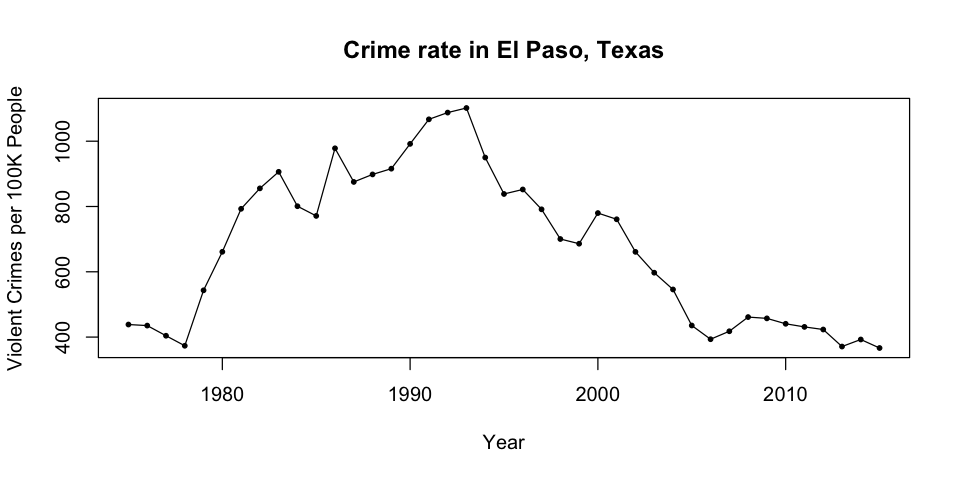

In [105]:
options(repr.plot.width=8,repr.plot.height=4)

plot(df_larger_city$year,df_larger_city$violent_per_100k,xlab="Year",ylab="Violent Crimes per 100K People",type="l",main=paste('Crime rate in',larger_city))
points(df_larger_city$year,df_larger_city$violent_per_100k,pch=19,cex=0.5)

- **Plotting the smaller city**

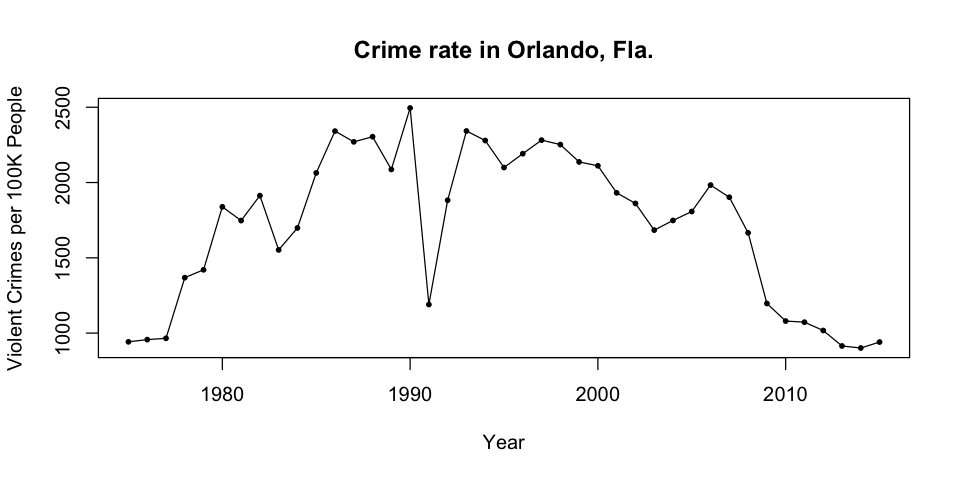

In [106]:
options(repr.plot.width=8,repr.plot.height=4)

plot(df_smaller_city$year,df_smaller_city$violent_per_100k,xlab="Year",ylab="Violent Crimes per 100K People",type="l",main=paste('Crime rate in',smaller_city))
points(df_smaller_city$year,df_smaller_city$violent_per_100k,pch=19,cex=0.5)

We'll see some better tools for plotting using `ggplot2` next time.

**Short bonus.** See if you can get the data into shape from the Major Cities Chiefs Association for 2016-2017, and update our analysis. The original report that generated the CSV we used [is posted here](https://www.majorcitieschiefs.com/pdf/news/mcca_violent_crime_data_midyear_20162015.pdf). An updated version for 2016-2017 [is posted here](https://www.majorcitieschiefs.com/pdf/news/mcca_violent_crime_report_2017_and_2016_midyear_07312017_update.pdf). Grab the file and see what you can do with it. Remember, I used [Tabula](http://tabula.technology/) to pull the data from the Chiefs' report and convert it to the more usable CSV file we loaded into R. See what you can do to convert the new file and try loading it into R.

[I tried to get a csv out the pdf reports here](https://github.com/Yuanqi-Hong/r-stat/blob/master/homework/Untitled.ipynb)